In [1]:
from pandas.io.parsers.readers import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.ar_model import AR


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 4.- Funcion que calcula PACF

In [6]:
## Lectura de los datos para prueba
dir = input("Introdusca la direccion del archivo para leer:")
data = pd.read_csv(dir)


## Creacion de la funcion
def Grf_PACF1 (datos):
  fig = plt.figure(figsize=(12, 8))
  ax2 = fig.add_subplot(212)
  fig = sm.graphics.tsa.plot_pacf(datos, lags=40, ax=ax2)

Introdusca la direccion del archivo para leer:/content/gdp.csv


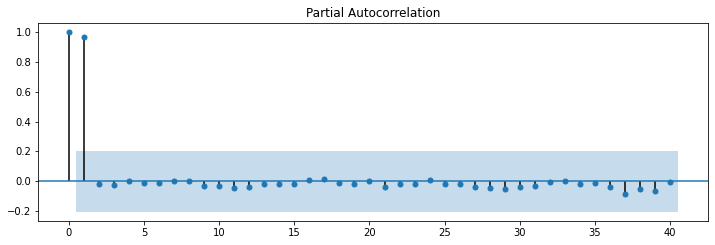

In [10]:
Grf_PACF1 (data['GDP'])

# 6.-


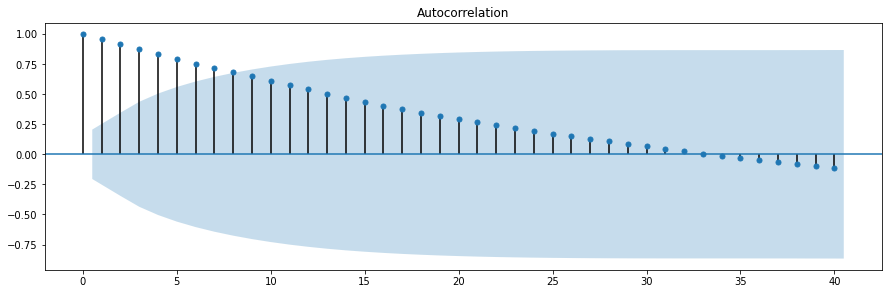

In [17]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['GDP'], lags=40, ax=ax1)


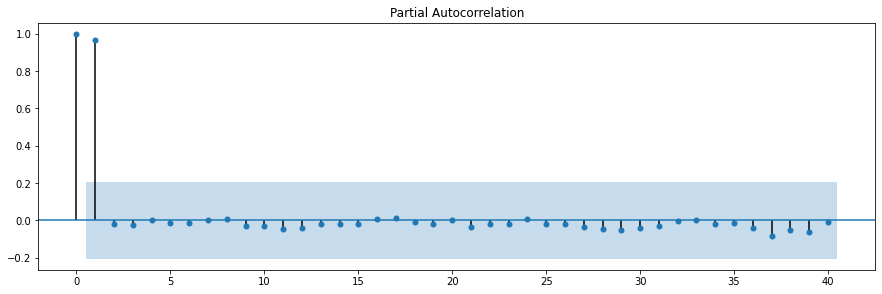

In [18]:
fig = plt.figure(figsize=(15, 10))
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['GDP'], lags=40, ax=ax2)

In [31]:
ar_mod= AR(data['GDP']).fit()
print(ar_mod.params)
print("AIC",ar_mod.aic," ", "BIC",ar_mod.bic)

const     -2.061821
L1.GDP     1.407578
L2.GDP    -0.304554
L3.GDP    -0.217487
L4.GDP     0.054114
L5.GDP    -0.108358
L6.GDP     0.290175
L7.GDP    -0.154922
L8.GDP     0.093846
L9.GDP    -0.069201
L10.GDP    0.154464
L11.GDP   -0.249002
L12.GDP    0.121150
dtype: float64
AIC 3.5585711038442476   BIC 3.9784732549143524


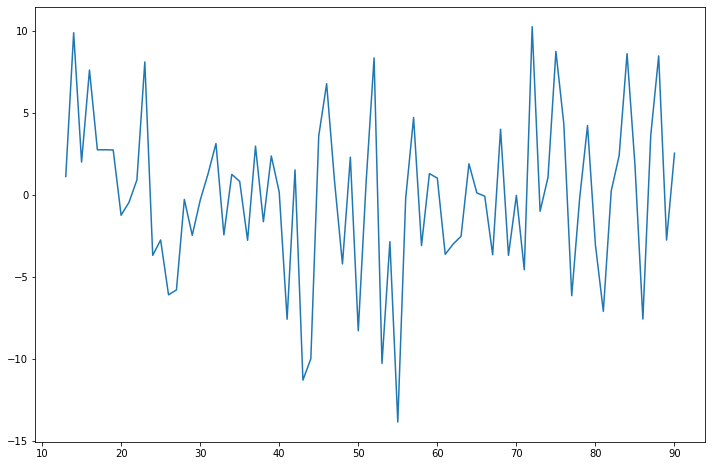

In [35]:
resid = ar_mod.resid
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax = plt.plot(resid[1::])

NormaltestResult(statistic=1.3024905411798984, pvalue=0.5213960931085364)


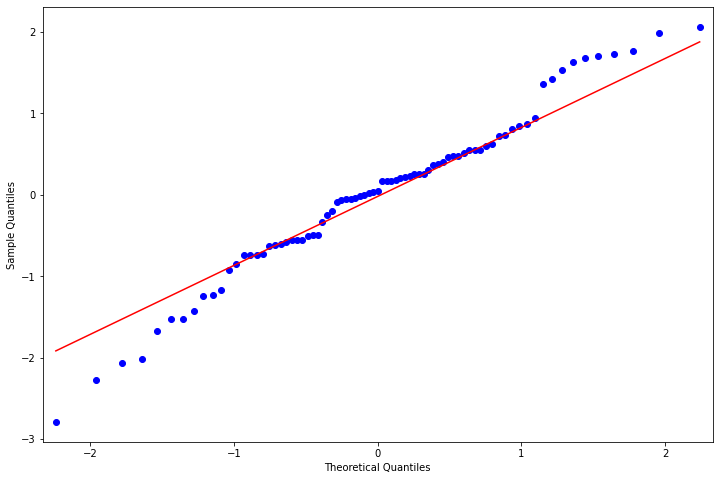

In [37]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line="q", ax=ax, fit=True)

# FORECASTING

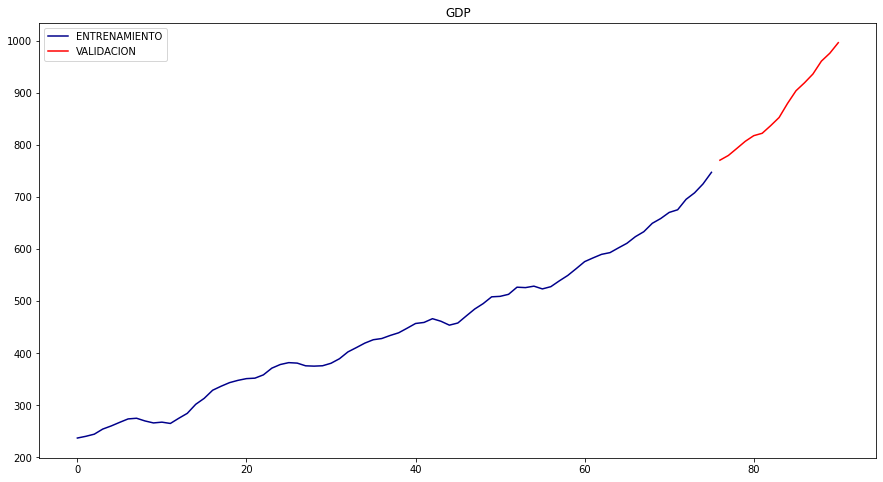

In [43]:
#ENTRENAMIENTO Y VALIDACION DE DATOS PARA EL MODELO
train = data.iloc[0:-15]
valid = data.iloc[76::]
train['GDP'].plot(figsize=(15,8),title = "GDP",label="ENTRENAMIENTO",color = "darkblue")
valid['GDP'].plot(figsize=(15,8),title = "GDP",label="VALIDACION",color="red")
plt.legend(loc="best")
plt.show()

In [44]:
model = AR(train['GDP'])
model_fit = model.fit()
predict = model_fit.predict(start=valid.index[0],end=valid.index[-1],dynamic = False)
predict.tail() ## 5 trimestres

86    891.231026
87    905.801387
88    920.548375
89    935.265068
90    950.025454
dtype: float64

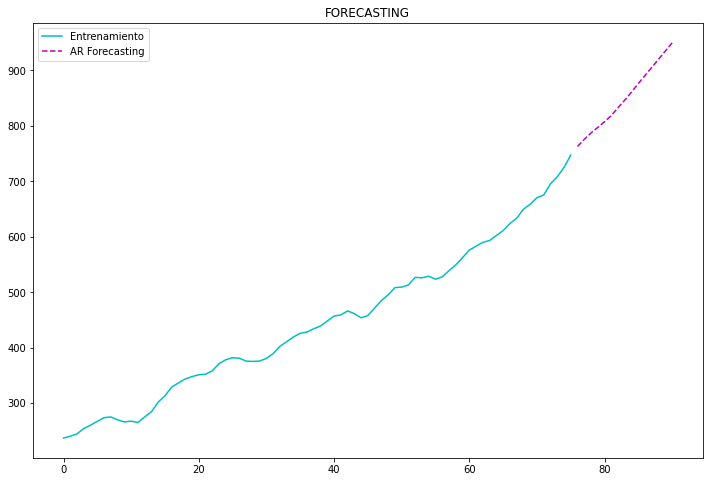

In [57]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['GDP'],label = "Entrenamiento", color="c")
plt.plot(predict,label="AR Forecasting",linestyle='dashed',color="m") 
plt.legend(loc="best")
plt.title("FORECASTING")
plt.show()

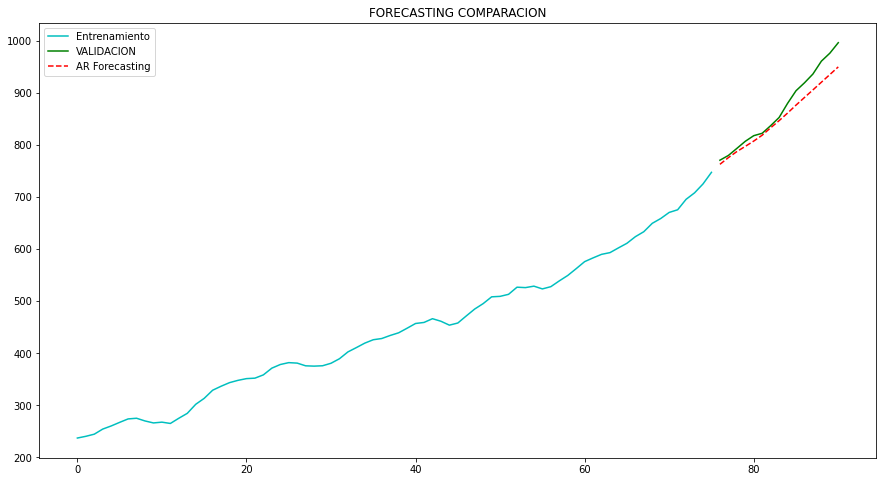

In [60]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['GDP'],label = "Entrenamiento", color="c")
valid['GDP'].plot(figsize=(15,8),title = "GDP",label="VALIDACION",color="g")
plt.plot(predict,label="AR Forecasting",linestyle='dashed',color="r") 
plt.legend(loc="best")
plt.title("FORECASTING COMPARACION")
plt.show()